<a href="https://colab.research.google.com/github/adhish-bahl/2347203_NNDL_Lab/blob/main/2347203_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing Libraries**

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import UpSampling2D, Input, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Dense, Reshape, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

#### **Loading Dataset**

In [58]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### **Part 1: CNN Autoencoder**

**Reshape for CNN input**

In [59]:
input_shape = x_train.shape[1:]

**Encoder**

In [60]:
encoder = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same')
])

**Decoder**

In [61]:
decoder = models.Sequential([
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')
])

**Model**

In [62]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')


**Train the Autoencoder**

In [63]:
history = autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 167s 530ms/step - loss: 0.0205 - val_loss: 0.0062
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 443ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 459ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 438ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 442ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 431ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 437ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 430ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 442ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 439ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 444ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 12

**Visualize Input and Reconstructed Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


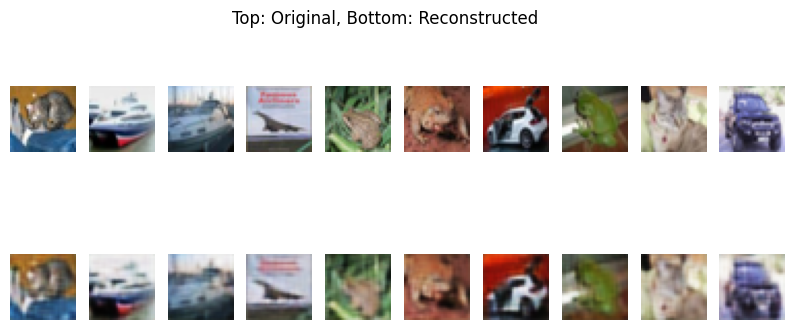

In [64]:
decoded_imgs = autoencoder.predict(x_test[:10])

plt.figure(figsize=(10, 4))
for i in range(10):
    # Original Images
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i])
    plt.axis('off')

    # Reconstructed Images
    plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i])
    plt.axis('off')
plt.suptitle("Top: Original, Bottom: Reconstructed")
plt.show()

Visually, the reconstructed photos resemble the originals, however compression may have blurred some details.with a 0.0023 Mean Squared Error (MSE). This suggests that there is not much of a pixel-by-pixel difference between the original and reconstructed images.

**Latent Space Visualization**

In [65]:
reconstructed_imgs = autoencoder.predict(x_test)
mse = np.mean([mean_squared_error(x_test[i].flatten(), reconstructed_imgs[i].flatten()) for i in range(len(x_test))])
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
print("Mean Squared Error:", mse)

latent_space = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
Mean Squared Error: 0.0023249318
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


**Flatten the latent space for t-SNE or PCA**

In [66]:
latent_space_flat = latent_space.reshape(latent_space.shape[0], -1)

**Apply PCA**

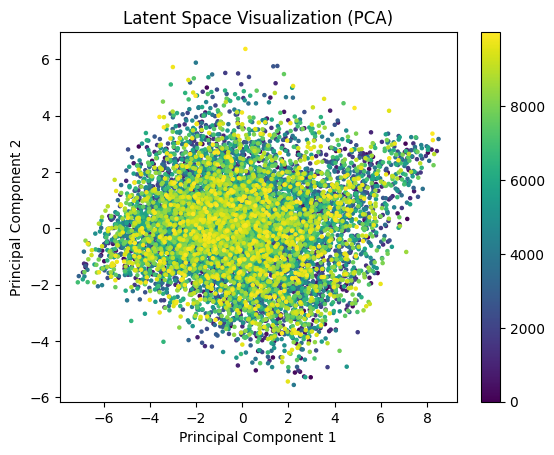

In [67]:
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_space_flat)

plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=np.arange(len(latent_pca)), cmap='viridis', s=5)
plt.colorbar()
plt.title("Latent Space Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

The autoencoder has successfully captured common features across the dataset, as evidenced by the dense core region in the PCA depiction of the latent space, where the majority of the data points cluster tightly together. Instead of learning class-specific characteristics, the autoencoder appears to encode data in a continuous latent space, as seen by the points' rather uniform distribution and lack of clear separations.

#### **Part 2: LSTM Autoencoder**

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
data = pd.read_csv('/content/drive/MyDrive/Trimester5/NNDL/Lab/Lab6/AppleHistoricalQuotes.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [71]:
data[' Close/Last'] = data[' Close/Last'].replace({'\$': '', ',': ''}, regex=True)
data[' Close/Last'] = data[' Close/Last'].astype(float)

stock_prices = data[' Close/Last'].values.reshape(-1, 1)

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_scaled = scaler.fit_transform(stock_prices)

**Generate synthetic sequential data**

In [75]:
from sklearn.model_selection import train_test_split

sequence_length = 30
X = []
y = []

for i in range(len(stock_prices_scaled) - sequence_length):
    X.append(stock_prices_scaled[i:i+sequence_length, 0])
    y.append(stock_prices_scaled[i+sequence_length, 0])

X = np.array(X)
y = np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define the LSTM Autoencoder**

In [76]:
def build_lstm_autoencoder(input_shape):
    model = Sequential()

    # Encoder
    model.add(LSTM(128, activation='relu', input_shape=input_shape, return_sequences=False))

    # Latent space representation
    model.add(RepeatVector(sequence_length))

    # Decoder
    model.add(LSTM(128, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(1)))

    model.compile(optimizer='adam', loss='mse')
    return model

# Build the model
model = build_lstm_autoencoder((X_train.shape[1], 1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Autoencoder**

In [77]:
history = model.fit(X_train, X_train, epochs=20, batch_size=32, validation_data=(X_test, X_test), verbose=1)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0276 - val_loss: 0.0027
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0020 - val_loss: 9.8153e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 8.8571e-04 - val_loss: 4.9596e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 4.7657e-04 - val_loss: 8.6988e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 4.9980e-04 - val_loss: 4.9122e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 4.6791e-04 - val_loss: 4.2631e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - loss: 5.8471e-04 - val_loss: 2.8958e-04
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 3.5044e-04 - val_loss: 2.7413e-04
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - loss: 3.2251e-04 - val_loss: 5.3179e-04
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - loss: 3.5672e-04 - val_loss: 2.5019e-04
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 2.9105e-0

**Visualize Original and Reconstructed Sequences**

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step


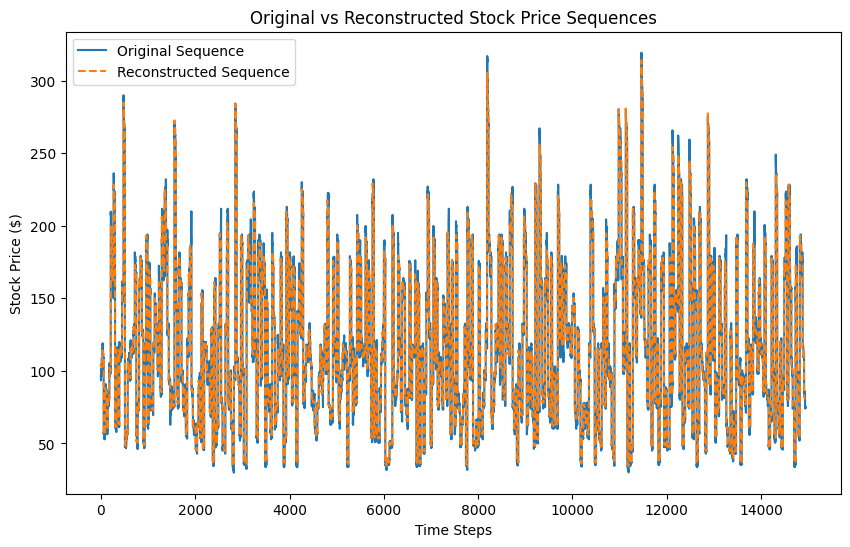

In [78]:
# Predict the reconstructed sequences on test set
X_pred = model.predict(X_test)

# Inverse transform to get the original stock prices (from scaled data)
X_test_inv = scaler.inverse_transform(X_test.reshape(-1, 1))
X_pred_inv = scaler.inverse_transform(X_pred.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(X_test_inv, label="Original Sequence")
plt.plot(X_pred_inv, label="Reconstructed Sequence", linestyle='dashed')

plt.xlabel("Time Steps")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.title("Original vs Reconstructed Stock Price Sequences")
plt.show()

In [79]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(X_test_inv, X_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 19.514480950459152


The goal of the LSTM autoencoder is to use the latent representation to reconstruct the stock price sequences. You may assess how successfully the model learns the temporal connections and reconstructs the stock price data by using MSE to compare the rebuilt sequences to the original ones. Better reconstruction quality is indicated by a lower MSE value.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


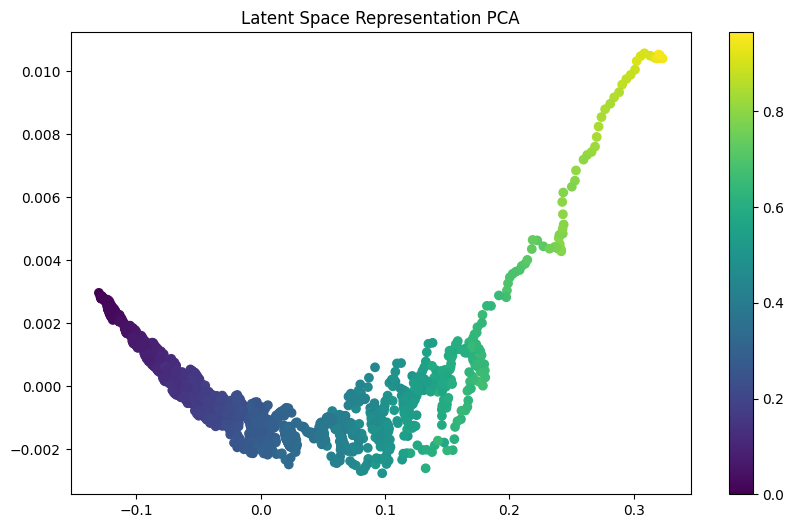

In [80]:
# Extract the encoder part of the model to get the latent representations
encoder = Sequential()
encoder.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=False))

latent_representations = encoder.predict(X_train)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_representations)

plt.figure(figsize=(10, 6))
plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title("Latent Space Representation PCA")
plt.show()

The latent space dimensionality is determined by the number of LSTM units in the encoder and decoder. The reconstruction may lose crucial information if the latent space is too small, which would raise the MSE and make the reconstruction less accurate. More information is retained by a bigger latent space, but the compression efficiency may be decreased. To strike a compromise between dimensionality and reconstruction quality, you can experiment with various LSTM unit sizes.